<a href="https://colab.research.google.com/github/saiprithi9346/Feb_2025_Python/blob/main/Assignment_1_Titanic_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the dataset and display info

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/train.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Show data types and check for null values
print("\nDataset Info:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [5]:
# Step 2: Clean the dataset

# Drop irrelevant columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check that no missing values remain
print("Missing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipython-input-5-839506721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-839506721.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [6]:
# Step 3: Convert categorical columns using one-hot encoding

# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Check the dataframe after encoding
print("Dataframe after one-hot encoding:")
print(df.head())


Dataframe after one-hot encoding:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 4: Normalize numerical columns
scaler = StandardScaler()
numerical_features = ['Age', 'SibSp', 'Fare']  # Columns to scale

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 5: Select features and target
# These are the columns after one-hot encoding and scaling
features = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = df[features]
y = df[target]

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (712, 7)
Test set shape: (179, 7)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Step 7: Build the model
model = Sequential()

# Input layer + hidden layer with Xavier initialization
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # 30% dropout

# Optional: Add another hidden layer
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 8: Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 9: Define early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Step 10: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5019 - loss: 0.9085 - val_accuracy: 0.6364 - val_loss: 0.6358
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6322 - loss: 0.7256 - val_accuracy: 0.6364 - val_loss: 0.6121
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6813 - loss: 0.6350 - val_accuracy: 0.6503 - val_loss: 0.6004
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7269 - loss: 0.5789 - val_accuracy: 0.6573 - val_loss: 0.5933
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7712 - loss: 0.5058 - val_accuracy: 0.6713 - val_loss: 0.5883
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7784 - loss: 0.5537 - val_accuracy: 0.7063 - val_loss: 0.5801
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7878 - loss: 0.5179 - val_accuracy: 0.7063 - val_loss: 0.5710
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7983 - loss: 0.4728 - val_accuracy: 0.7203 - 

Test Accuracy: 0.7765
Test Loss: 0.4717


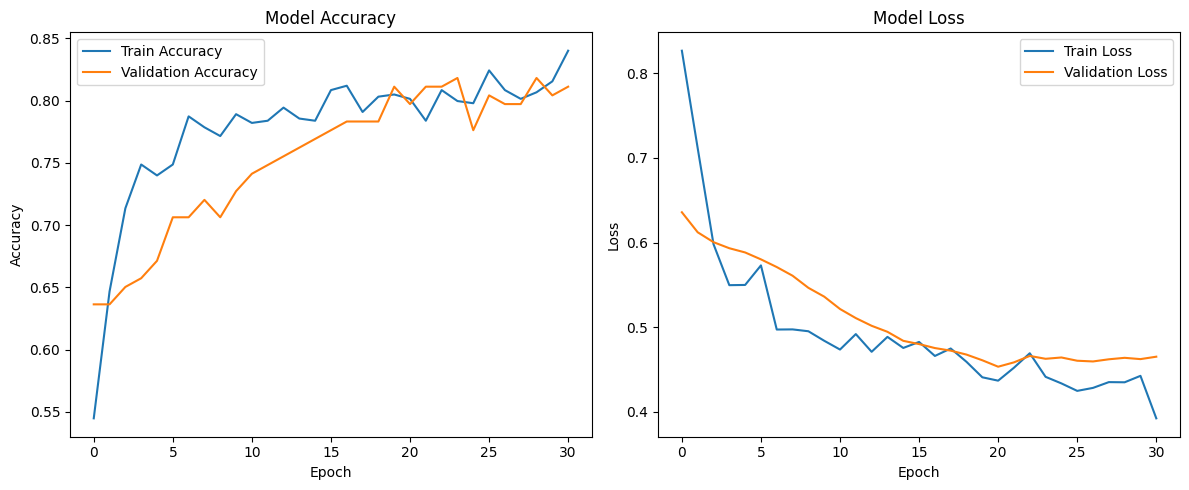

In [12]:
import matplotlib.pyplot as plt

# Step 11: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 12: Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()




In [13]:
# Step 13: Predict survival on a few test passengers
import numpy as np

# Select a few samples from test set
num_samples = 5
X_sample = X_test[:num_samples]

# Predict probabilities
pred_probs = model.predict(X_sample)

# Convert probabilities to binary labels (threshold = 0.5)
pred_labels = (pred_probs >= 0.5).astype(int)

# Display predictions
for i in range(num_samples):
    print(f"Passenger {i+1}:")
    print(f"  Predicted Probability of Survival: {pred_probs[i][0]:.4f}")
    print(f"  Predicted Label: {pred_labels[i][0]}")
    print("-" * 40)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Passenger 1:
  Predicted Probability of Survival: 0.1378
  Predicted Label: 0
----------------------------------------
Passenger 2:
  Predicted Probability of Survival: 0.1305
  Predicted Label: 0
----------------------------------------
Passenger 3:
  Predicted Probability of Survival: 0.1786
  Predicted Label: 0
----------------------------------------
Passenger 4:
  Predicted Probability of Survival: 0.0796
  Predicted Label: 0
----------------------------------------
Passenger 5:
  Predicted Probability of Survival: 0.6086
  Predicted Label: 1
----------------------------------------


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 


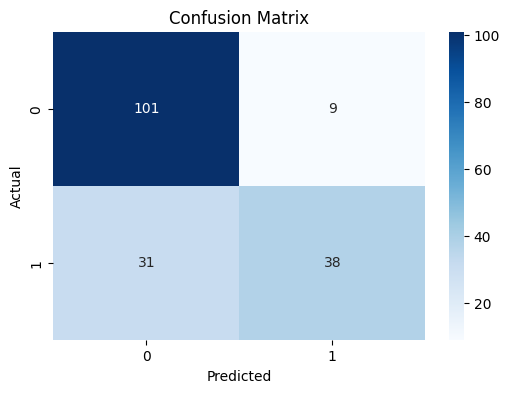


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.83       110
           1       0.81      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/tmp/ipython-input-15-247766991.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-15-247766991.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5735 - loss: 0.7963 - val_accuracy: 0.6224 - val_loss: 0.6297
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6622 - loss: 0.7048 - val_accuracy: 0.6294 - val_loss: 0.6172
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7077 - loss: 0.6446 - val_accuracy: 0.6224 - val_loss: 0.6106
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 0.5860 - val_accuracy: 0.6364 - val_loss: 0.6023
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7856 - loss: 0.5014 - val_accuracy: 0.6783 - val_loss: 0.5907
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7411 - loss: 0.6059 - val_accuracy: 0.6923 - val_loss: 0.5827
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7677 - loss: 0.5122 - val_accuracy: 0.6993 - val_loss: 0.5684
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7948 - loss: 0.5157 - val_accuracy: 0.7063 

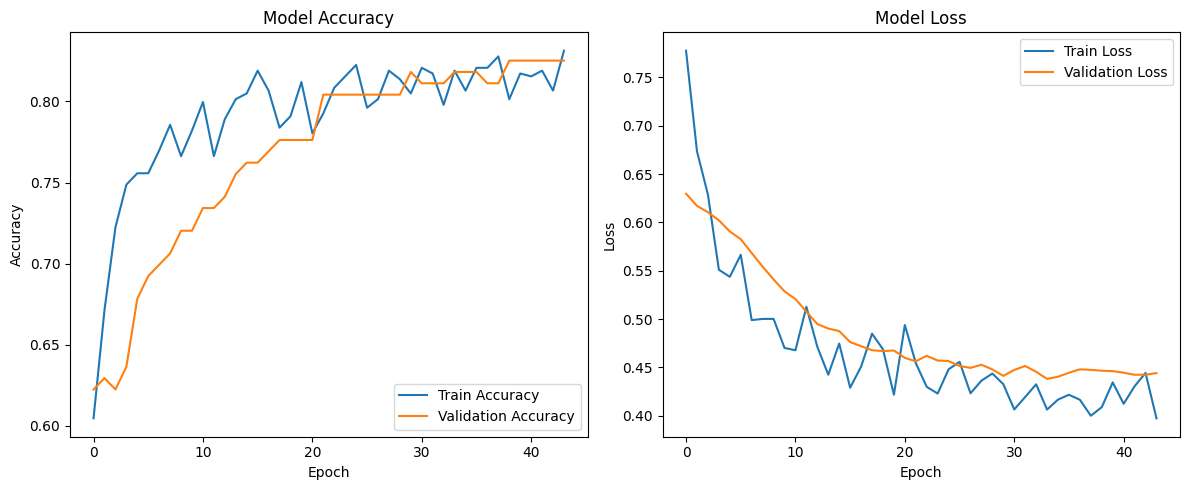


Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Passenger 1: Probability = 0.0672, Predicted Label = 0
Passenger 2: Probability = 0.1012, Predicted Label = 0
Passenger 3: Probability = 0.1573, Predicted Label = 0
Passenger 4: Probability = 0.0307, Predicted Label = 0
Passenger 5: Probability = 0.7171, Predicted Label = 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


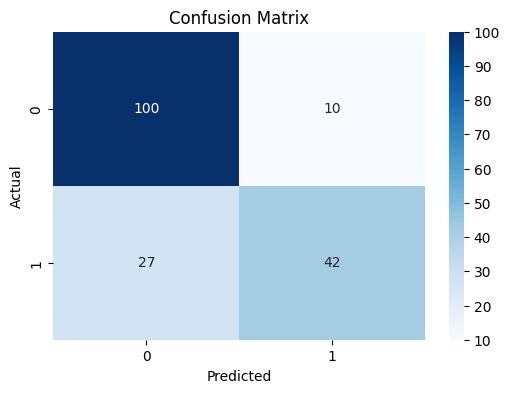


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.81      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179

Model saved as titanic_model.h5
Loaded model test accuracy: 0.7932960987091064


In [15]:
# Titanic Survival Prediction using Neural Networks

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load dataset
df = pd.read_csv("train.csv")

# Step 3: Data cleaning
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 4: One-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 5: Normalize numerical features
scaler = StandardScaler()
df[['Age', 'SibSp', 'Fare']] = scaler.fit_transform(df[['Age', 'SibSp', 'Fare']])

# Step 6: Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Build model
model = Sequential([
    Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Step 9: Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 10: Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Step 11: Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Step 12: Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 13: Predict on few passengers
print("\nSample Predictions:")
sample = X_test[:5]
probs = model.predict(sample)
labels = (probs >= 0.5).astype(int)
for i in range(len(sample)):
    print(f"Passenger {i+1}: Probability = {probs[i][0]:.4f}, Predicted Label = {labels[i][0]}")

# Step 14: Confusion Matrix and Classification Report
y_pred = (model.predict(X_test) >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 15: Save and Load model
model.save("titanic_model.h5")
print("Model saved as titanic_model.h5")

loaded_model = tf.keras.models.load_model("titanic_model.h5")
print("Loaded model test accuracy:", loaded_model.evaluate(X_test, y_test, verbose=0)[1])
